In [1]:
#coding=utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn import  model_selection
from sklearn import grid_search

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

from sklearn import metrics

from sklearn.learning_curve import learning_curve


#记录程序运行时间
import time

#读入数据
train = pd.read_csv("../feature/train_data_new_payback_loanflag.csv",encoding="utf-8")
columns=['loan_sum','loan_flag_1','loan_flag_2','loan_flag_3','active_date', 'age', '1M_loan_amount_sum', '3M_payback_sum', '2M_loan_amount_sum', '3M_loan_amount_sum', 'loan_period_2', 'loan_period_1', '2M_payback_sum', '1M_pid_param_1016', 'limit', '1M_cost_min', '2M_cost_mean', '1M_loan_amount_max', '2M_cost_min', 'cost_period_1', '3M_cost_mean', '1M_cost_max', '1M_cost_mean', '3M_pid_param_81', '1M_pid_param_1028', '2M_pid_param_1026', '1M_payback_sum', '2M_cost_sum', '2M_cost_max', '3M_cost_min', '1M_loan_amount_min', '3M_loan_amount_min', '3M_payback_max', '3M_cost_max', '3M_loan_amount_max', '2M_pid_param_1016', '2M_loan_amount_max', '2M_payback_max', '2M_pid_param_1028', '3M_pid_param_1016', '1M_cost_sum', '1M_loan_amount_mean', '3M_cost_sum', '1M_pid_param_1030', '1M_plannum_sum', '3M_loan_amount_mean', '2M_loan_amount_mean', '2M_payback_min', '1M_pid_param_81', 'cost_period_2', '2M_loan_amount_min', '1M_payback_max', '2M_plannum_sum', '3M_pid_param_1028', '1M_plannum_mean', '1M_cost_count', '1M_pid_param_1026', '3M_payback_min', '2M_pid_param_81', '2M_pid_param_1030', '1M_cate_id_10', '2M_payback_mean', 'sex', '2M_cost_count', '3M_plannum_sum', '1M_payback_min', '1M_cate_id_26', '1M_cate_id_1', '3M_payback_mean', '1M_cate_id_44', '3M_cate_id_3', '1M_pid_param_41', '3M_cate_id_10', '3M_pid_param_1026', '1M_pid_param_1031', '1M_cate_id_33', '3M_cate_id_26', '2M_cate_id_10', '1M_pid_param_61', '1M_pid_param_1029', '2M_pid_param_510', '2M_cate_id_13', '1M_cate_id_36', '1M_payback_mean', '2M_cate_id_9', '3M_pid_param_1030', '1M_cate_id_25', '1M_cate_id_19', '3M_cate_id_36', '1M_pid_param_510', '1M_pid_param_82', '3M_cost_count', '2M_cate_id_1', '3M_pid_param_82', '1M_pid_param_24', '3M_pid_param_61', '2M_cate_id_26', '1M_cate_id_22', '3M_cate_id_33', '2M_pid_param_144', '1M_pid_param_91', '3M_pid_param_1033', '3M_pid_param_79', '3M_cate_id_25', '3M_pid_param_73', '2M_cate_id_33', '1M_cate_id_15', '1M_cate_id_12', '3M_pid_param_313', '1M_pid_param_83', '2M_cate_id_15', '2M_cate_id_36', '3M_cate_id_44', '3M_pid_param_1031', '1M_pid_param_1033', '3M_cate_id_40', '3M_pid_param_1029', '3M_pid_param_510', '3M_cate_id_21', '3M_pid_param_712', '2M_pid_param_148', '2M_pid_param_1029', '3M_pid_param_78', '2M_pid_param_65', '1M_cate_id_11', '2M_pid_param_1033', '2M_pid_param_26', '2M_cate_id_12', '1M_cate_id_40', '1M_cate_id_3', '1M_pid_param_145', '3M_cate_id_22', '3M_cate_id_7', '2M_pid_param_312', '2M_pid_param_713', '2M_pid_param_91', '3M_pid_param_65', '2M_cate_id_22', '1M_pid_param_130', '2M_pid_param_712', '2M_pid_param_130', '3M_cate_id_43', '3M_plannum_mean', '1M_pid_param_65', '1M_pid_param_74', '1M_cate_id_39', '1M_cate_id_38', '1M_cate_id_9', '1M_pid_param_144', '2M_pid_param_119', '1M_pid_param_78', '1M_pid_param_1018', '3M_pid_param_24', '3M_cate_id_1', '3M_cate_id_14', '2M_cate_id_35', '2M_pid_param_83', '2M_cate_id_44', '3M_cate_id_11', '2M_cate_id_40', '2M_cate_id_6', '1M_pid_param_76', '1M_pid_param_1020', '2M_cate_id_25', '3M_pid_param_92', '3M_pid_param_77', '3M_pid_param_312', '1M_pid_param_1017', '3M_cate_id_9', '2M_pid_param_79', '1M_pid_param_119', '2M_pid_param_92', '3M_pid_param_91', '1M_cate_id_14', '1M_pid_param_73', '3M_pid_param_134', '2M_pid_param_72', '3M_cate_id_38', '1M_pid_param_116', '3M_cate_id_15', '2M_pid_param_77', '2M_cate_id_18', '3M_cate_id_23', '3M_pid_param_116', '2M_pid_param_313', '3M_pid_param_72', '1M_pid_param_313', '2M_plannum_min', '2M_pid_param_41', '2M_pid_param_1031', '3M_pid_param_145', '2M_plannum_mean', '1M_pid_param_31', '3M_cate_id_35', '1M_pid_param_1032', '1M_cate_id_7', '1M_plannum_max', '2M_pid_param_316', '1M_pid_param_114', '2M_cate_id_19', '2M_cate_id_11', '3M_pid_param_513', '3M_pid_param_83', '1M_cate_id_35', '1M_pid_param_1022', '2M_pid_param_61', '3M_pid_param_310', '3M_pid_param_713', '3M_cate_id_19', '3M_cate_id_18', '2M_pid_param_24', '3M_pid_param_41', '3M_pid_param_119', '2M_pid_param_57', '1M_pid_param_312', '3M_pid_param_144', '3M_pid_param_63', '1M_plannum_min', '1M_cate_id_21', '1M_pid_param_79', '3M_pid_param_94', '2M_pid_param_711', '1M_pid_param_126', '2M_pid_param_126', '2M_pid_param_39', '2M_pid_param_25', '3M_pid_param_101', '1M_pid_param_72', '2M_pid_param_17', '3M_pid_param_1038', '1M_pid_param_25', '1M_pid_param_26', '3M_pid_param_25', '3M_plannum_min', '2M_pid_param_76', '2M_pid_param_11', '1M_pid_param_92', '3M_pid_param_1017', '3M_cate_id_13', '2M_cate_id_14', '2M_pid_param_22', '2M_pid_param_1021', '3M_pid_param_131', '1M_pid_param_77', '3M_cate_id_6', '3M_cate_id_12', '2M_pid_param_82', '1M_pid_param_715', '3M_cate_id_2', '1M_cate_id_23', '3M_pid_param_1036', '1M_pid_param_22', '3M_pid_param_26', '2M_pid_param_145', '1M_cate_id_6', '3M_pid_param_311', '3M_cate_id_17', '2M_pid_param_28', '2M_pid_param_78', '2M_pid_param_1032', '3M_pid_param_37', '2M_plannum_max', '2M_pid_param_133', '2M_pid_param_714', '2M_pid_param_73', '1M_cate_id_18', '1M_pid_param_140', '3M_pid_param_715', '3M_pid_param_130', '1M_pid_param_93', '1M_pid_param_134', '3M_pid_param_117', '3M_pid_param_1018', '2M_cate_id_21', '1M_pid_param_138', '2M_pid_param_129', '2M_pid_param_118', '2M_pid_param_63', '3M_plannum_max', '1M_pid_param_21', '3M_pid_param_38', '3M_pid_param_316', '2M_pid_param_93', '3M_pid_param_14', '3M_pid_param_28', '1M_pid_param_102', '3M_pid_param_120', '2M_cate_id_7', '1M_cate_id_13', '2M_pid_param_13', '1M_pid_param_1010', '1M_pid_param_19', '2M_pid_param_37', '3M_pid_param_74', '3M_loan_amount_count', '2M_pid_param_134', '2M_pid_param_310', '1M_pid_param_141', '1M_pid_param_36', '2M_cate_id_3', '1M_pid_param_120', '2M_pid_param_140', '2M_cate_id_32', '3M_pid_param_93', '3M_pid_param_1022', '1M_pid_param_512', '3M_pid_param_39', '2M_cate_id_23', '1M_pid_param_1021', '1M_pid_param_110', '3M_pid_param_19', '2M_pid_param_513', '1M_pid_param_27', '1M_pid_param_314', '3M_pid_param_139', '1M_pid_param_310', '2M_pid_param_36', '1M_pid_param_311', '2M_pid_param_120', '3M_pid_param_132', '3M_pid_param_84', '3M_pid_param_1021', '1M_pid_param_101', '1M_pid_param_117', '2M_cate_id_39', '3M_pid_param_1019', '3M_pid_param_17', '1M_pid_param_28', '3M_pid_param_711', '3M_pid_param_22', '3M_pid_param_1037', '2M_pid_param_56', '2M_pid_param_1019', '1M_pid_param_711', '1M_pid_param_1014', '1M_pid_param_112', '1M_cate_id_2', '1M_pid_param_1027', '1M_cate_id_17', '1M_pid_param_42', '2M_loan_amount_count', '1M_pid_param_39', '3M_pid_param_140', '3M_pid_param_114', '2M_pid_param_75', '3M_pid_param_21', '1M_pid_param_131', '2M_pid_param_311', '2M_pid_param_19', '2M_pid_param_112', '3M_pid_param_27', '1M_pid_param_713', '2M_pid_param_27', '1M_pid_param_123', '1M_pid_param_33', '3M_cate_id_39', '1M_pid_param_128', '2M_pid_param_38', '2M_pid_param_116', '1M_pid_param_1019', '3M_pid_param_148', '3M_pid_param_36', '3M_pid_param_138', '3M_cate_id_31', '3M_pid_param_43', '2M_pid_param_1022', '3M_pid_param_105', '2M_pid_param_710', '1M_pid_param_63', '2M_pid_param_127', '1M_pid_param_23', '1M_pid_param_714', '1M_pid_param_15', '3M_pid_param_56', '2M_pid_param_314', '3M_pid_param_102', '3M_pid_param_1032', '1M_pid_param_75', '2M_cate_id_31', '2M_pid_param_715', '1M_pid_param_113', '2M_cate_id_16', '1M_pid_param_513', '2M_pid_param_128', '2M_pid_param_71', '3M_pid_param_18', '1M_pid_param_712', '3M_pid_param_104', '2M_pid_param_74', '3M_pid_param_126', '1M_pid_param_146', '3M_pid_param_115', '2M_pid_param_18', '2M_cate_id_38', '2M_pid_param_31', '3M_pid_param_71', '1M_pid_param_35', '3M_pid_param_314', '2M_pid_param_132', '1M_pid_param_84', '3M_pid_param_35']
train.drop('uid',1,inplace=True)
train=train.loc[:,columns]
# tests = pd.read_csv("../feature/test_data_4_add3.csv",encoding="utf-8")
# online = tests.loc[:,['uid', 'loan_sum']]
# tests.drop('uid',1,inplace=True)


train_xy_set,offline_test = train_test_split(train, test_size = 0.25,random_state=36)
train_xy,val = train_test_split(train_xy_set, test_size = 0.333,random_state=24)

#random_state is of big influence for val-auc
y = train_xy.loan_sum
X = train_xy.drop(['loan_sum'],axis=1)
# y = np.log1p(train_xy.loan_sum)
numeric_cols = X.columns[X.dtypes != 'object'].values
# numeric_cols=np.delete(numeric_cols, [6,7])
numeric_cols=numeric_cols.tolist()
numeric_cols.remove('cost_period_1')
numeric_cols.remove('cost_period_2')
numeric_cols.remove('loan_period_2')
numeric_cols.remove('loan_period_1')
X.loc[:, numeric_cols] = np.log1p(X.loc[:,numeric_cols])


val_y = val.loan_sum
val_X = val.drop(['loan_sum'],axis=1)
# val_y = np.log1p(val.loan_sum)
numeric_cols = val_X.columns[val_X.dtypes != 'object'].values
# numeric_cols=np.delete(numeric_cols, [6,7])
numeric_cols=numeric_cols.tolist()
numeric_cols.remove('cost_period_1')
numeric_cols.remove('cost_period_2')
numeric_cols.remove('loan_period_2')
numeric_cols.remove('loan_period_1')
val_X.loc[:,numeric_cols] = np.log1p(val_X.loc[:,numeric_cols])


offline_test_y = offline_test.loan_sum
offline_test.drop(['loan_sum'],axis=1, inplace=True)
numeric_cols = offline_test.columns[offline_test.dtypes != 'object'].values
# numeric_cols=np.delete(numeric_cols, [6,7])
numeric_cols=numeric_cols.tolist()
numeric_cols.remove('cost_period_1')
numeric_cols.remove('cost_period_2')
numeric_cols.remove('loan_period_2')
numeric_cols.remove('loan_period_1')
offline_test.loc[:,numeric_cols] = np.log1p(offline_test.loc[:,numeric_cols])


# yy = train.loan_sum
# XX = train.drop(['loan_sum'],axis=1)

# XX=XX.append(XX, ignore_index=True)
# yy=yy.append(yy, ignore_index=True)


/home/fg/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/fg/tensorflow/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/fg/tensorflow/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  Deprec

In [2]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(50,201,50),
                   'max_depth':range(4,11,2)}
estimator = RandomForestRegressor(n_estimators = 100, criterion='mse',  max_features=0.2, max_depth=3,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_1,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.1min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.39059735,  0.39104832,  0.39042376,  0.39099671,  0.42116439,
        0.42256216,  0.42258744,  0.42215689,  0.47386143,  0.47520555,
        0.47510748,  0.47558513,  0.54128087,  0.541614  ,  0.54288013,
        0.54163031]), 'mean_test_score': array([ 0.38388145,  0.38408122,  0.38423128,  0.38434707,  0.39061223,
        0.39112693,  0.39099748,  0.39124835,  0.39098404,  0.39094264,
        0.39177847,  0.39176171,  0.38891371,  0.39037444,  0.39114353,
        0.390961  ]), 'std_test_score': array([ 0.00864632,  0.00856682,  0.0087496 ,  0.00838568,  0.0075995 ,
        0.00798101,  0.00808946,  0.00795998,  0.00778333,  0.00734498,
        0.0074424 ,  0.00743506,  0.00674923,  0.00781461,  0.00692538,
        0.00727327]), 'param_n_estimators': masked_array(data = [50 100 150 200 50 100 150 200 50 100 150 200 50 100 150 200],
             mask = [False False False False False False False False F

In [3]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(130,171,20),
                   'max_depth':range(7,10,1)}
estimator = RandomForestRegressor(n_estimators = 100, criterion='mse',  max_features=0.2, max_depth=3,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_1,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.8min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.44613657,  0.44596287,  0.44650731,  0.47551357,  0.474759  ,
        0.47586707,  0.50760819,  0.50780708,  0.50877383]), 'mean_test_score': array([ 0.39187384,  0.3919294 ,  0.39190919,  0.3917194 ,  0.39217547,
        0.39213673,  0.39125648,  0.39197091,  0.39116252]), 'std_test_score': array([ 0.00762401,  0.00788159,  0.00757859,  0.00722626,  0.00779919,
        0.00770948,  0.00763666,  0.00674615,  0.00740214]), 'param_n_estimators': masked_array(data = [130 150 170 130 150 170 130 150 170],
             mask = [False False False False False False False False False],
       fill_value = ?)
, 'split1_test_score': array([ 0.39323669,  0.39260388,  0.39304367,  0.39274116,  0.39385821,
        0.39274153,  0.39254683,  0.39334917,  0.39234521]), 'param_max_depth': masked_array(data = [7 7 7 8 8 8 9 9 9],
             mask = [False False False False False False False False False],
       fill_valu

In [4]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(145,156,5),
                   'max_depth':range(7,10,1)}
estimator = RandomForestRegressor(n_estimators = 100, criterion='mse',  max_features=0.2, max_depth=3,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_1,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.1min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.44608527,  0.44641015,  0.44650078,  0.4755802 ,  0.47625867,
        0.47445109,  0.50764622,  0.50817093,  0.50801173]), 'mean_test_score': array([ 0.39220747,  0.39178424,  0.39217125,  0.39168184,  0.39185801,
        0.39205381,  0.39200336,  0.39076572,  0.39095356]), 'std_test_score': array([ 0.00764902,  0.00783945,  0.00734599,  0.00766739,  0.0076993 ,
        0.00718434,  0.0077349 ,  0.0074214 ,  0.00661848]), 'param_n_estimators': masked_array(data = [145 150 155 145 150 155 145 150 155],
             mask = [False False False False False False False False False],
       fill_value = ?)
, 'split1_test_score': array([ 0.39331733,  0.39278529,  0.39346594,  0.39259965,  0.39324731,
        0.39342239,  0.3932517 ,  0.3921243 ,  0.39216905]), 'param_max_depth': masked_array(data = [7 7 7 8 8 8 9 9 9],
             mask = [False False False False False False False False False],
       fill_valu

In [5]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(143,148,2),
                   'max_depth':range(6,9,1)}
estimator = RandomForestRegressor(n_estimators = 100, criterion='mse',  max_features=0.2, max_depth=3,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_1,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.9min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.42223837,  0.42262649,  0.4222778 ,  0.44613533,  0.44605123,
        0.44642732,  0.47533994,  0.47587858,  0.47521793]), 'mean_test_score': array([ 0.39130281,  0.39114774,  0.39115049,  0.39197287,  0.39227879,
        0.39242112,  0.39201622,  0.39180195,  0.3921483 ]), 'std_test_score': array([ 0.00748491,  0.00784548,  0.00783246,  0.00762778,  0.00795345,
        0.00768847,  0.00722175,  0.0076718 ,  0.00807803]), 'param_n_estimators': masked_array(data = [143 145 147 143 145 147 143 145 147],
             mask = [False False False False False False False False False],
       fill_value = ?)
, 'split1_test_score': array([ 0.3924922 ,  0.39239078,  0.39237014,  0.39333062,  0.39355146,
        0.39366865,  0.39389688,  0.39336798,  0.39292545]), 'param_max_depth': masked_array(data = [6 6 6 7 7 7 8 8 8],
             mask = [False False False False False False False False False],
       fill_valu

In [6]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
estimator = RandomForestRegressor(n_estimators = 100, criterion='mse',  max_features=0.2, max_depth=3,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_1,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.9min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.42239852,  0.42240806,  0.42294159,  0.44637058,  0.44665718,
        0.4461602 ,  0.47510865,  0.4753407 ,  0.47581492]), 'mean_test_score': array([ 0.39111107,  0.3914464 ,  0.3911283 ,  0.39205518,  0.39153806,
        0.39218126,  0.39215596,  0.39170244,  0.39194973]), 'std_test_score': array([ 0.00795369,  0.00764253,  0.00780722,  0.00760637,  0.00742523,
        0.00744786,  0.00761237,  0.00774659,  0.00796589]), 'param_n_estimators': masked_array(data = [146 147 148 146 147 148 146 147 148],
             mask = [False False False False False False False False False],
       fill_value = ?)
, 'split1_test_score': array([ 0.39229887,  0.392452  ,  0.39251772,  0.39348574,  0.39290208,
        0.39361315,  0.39329373,  0.39361051,  0.39314379]), 'param_max_depth': masked_array(data = [6 6 6 7 7 7 8 8 8],
             mask = [False False False False False False False False False],
       fill_valu

In [8]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.2, max_depth=7,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_2,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.2min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.4375621 ,  0.44648154,  0.45033161,  0.4520382 ]), 'mean_test_score': array([ 0.39050553,  0.3919479 ,  0.39205739,  0.39150383]), 'std_test_score': array([ 0.00754514,  0.00745587,  0.00706414,  0.00714996]), 'mean_train_score': array([ 0.43756774,  0.44641547,  0.45005465,  0.45189181]), 'split1_test_score': array([ 0.39171079,  0.3930483 ,  0.39337038,  0.39342093]), 'mean_score_time': array([ 0.22483587,  0.22288593,  0.22424293,  0.22543629]), 'split2_train_score': array([ 0.44204618,  0.45012265,  0.45424809,  0.45607094]), 'params': [{'max_features': 0.1}, {'max_features': 0.2}, {'max_features': 0.3}, {'max_features': 0.4}], 'std_fit_time': array([ 0.18773297,  0.54554298,  0.97567915,  0.23608262]), 'std_train_score': array([ 0.00365433,  0.00305422,  0.00354241,  0.00347356]), 'param_max_features': masked_array(data = [0.1 0.2 0.3 0.4],
             mask = [False False False False],
       fill

In [9]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
debug_3={ 'min_samples_leaf':range(30,91,20)}
estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.3, max_depth=7,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_3,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.5min finished


--------------------DEBUG RESULTS-----------------
{'split2_train_score': array([ 0.43657488,  0.42902141,  0.42382036,  0.41963039]), 'split1_train_score': array([ 0.43278205,  0.42513122,  0.42019685,  0.41534262]), 'mean_test_score': array([ 0.3930122 ,  0.39283185,  0.39317257,  0.39253001]), 'std_test_score': array([ 0.00775935,  0.00787945,  0.00780806,  0.00752143]), 'mean_train_score': array([ 0.4324388 ,  0.42507911,  0.4196717 ,  0.4153357 ]), 'std_score_time': array([ 0.00194509,  0.00148801,  0.00078596,  0.00205345]), 'mean_score_time': array([ 0.22572549,  0.22544479,  0.22551552,  0.22326215]), 'param_min_samples_leaf': masked_array(data = [30 50 70 90],
             mask = [False False False False],
       fill_value = ?)
, 'params': [{'min_samples_leaf': 30}, {'min_samples_leaf': 50}, {'min_samples_leaf': 70}, {'min_samples_leaf': 90}], 'std_fit_time': array([ 0.51033327,  0.11751246,  0.04932968,  0.17288359]), 'std_train_score': array([ 0.00352559,  0.00324036,  0.00

In [10]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
debug_3={ 'min_samples_leaf':range(60,81,10)}
estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.3, max_depth=7,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_3,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min finished


--------------------DEBUG RESULTS-----------------
{'split2_train_score': array([ 0.42631371,  0.4236366 ,  0.4217391 ]), 'split1_train_score': array([ 0.42189935,  0.41974135,  0.41747581]), 'mean_test_score': array([ 0.39324347,  0.39289347,  0.39294369]), 'std_test_score': array([ 0.00774664,  0.00783917,  0.00761958]), 'mean_train_score': array([ 0.42207333,  0.41952578,  0.41744817]), 'std_score_time': array([ 0.00154008,  0.00040393,  0.00023672]), 'mean_score_time': array([ 0.2227327 ,  0.22571063,  0.22490017]), 'param_min_samples_leaf': masked_array(data = [60 70 80],
             mask = [False False False],
       fill_value = ?)
, 'params': [{'min_samples_leaf': 60}, {'min_samples_leaf': 70}, {'min_samples_leaf': 80}], 'std_fit_time': array([ 0.18030733,  0.2420982 ,  0.29482407]), 'std_train_score': array([ 0.00339347,  0.00344785,  0.00351487]), 'rank_test_score': array([1, 3, 2], dtype=int32), 'split0_test_score': array([ 0.40175007,  0.4012979 ,  0.40104652]), 'split2_te

In [11]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
debug_3={ 'min_samples_leaf':range(55,66,5)}
estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.3, max_depth=7,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_3,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min finished


--------------------DEBUG RESULTS-----------------
{'split2_train_score': array([ 0.42772033,  0.42621484,  0.42474937]), 'split1_train_score': array([ 0.4235849 ,  0.42215124,  0.421118  ]), 'mean_test_score': array([ 0.3928653 ,  0.39284292,  0.39271394]), 'std_test_score': array([ 0.00794669,  0.00766087,  0.00783228]), 'mean_train_score': array([ 0.42358033,  0.42215514,  0.42074356]), 'std_score_time': array([ 0.00238016,  0.00172343,  0.00117317]), 'mean_score_time': array([ 0.22219022,  0.22468487,  0.22505283]), 'param_min_samples_leaf': masked_array(data = [55 60 65],
             mask = [False False False],
       fill_value = ?)
, 'params': [{'min_samples_leaf': 55}, {'min_samples_leaf': 60}, {'min_samples_leaf': 65}], 'std_fit_time': array([ 0.67199475,  0.0917706 ,  0.79255441]), 'std_train_score': array([ 0.00338217,  0.00331314,  0.00343382]), 'rank_test_score': array([1, 2, 3], dtype=int32), 'split0_test_score': array([ 0.40127618,  0.40102191,  0.40092658]), 'split2_te

In [12]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
debug_3={ 'min_samples_leaf':range(53,58,2)}
estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.3, max_depth=7,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_3,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.9min finished


--------------------DEBUG RESULTS-----------------
{'split2_train_score': array([ 0.42811349,  0.42788696,  0.42683802]), 'split1_train_score': array([ 0.42465162,  0.42404819,  0.42374551]), 'mean_test_score': array([ 0.39262381,  0.39278546,  0.39273119]), 'std_test_score': array([ 0.00789036,  0.00762104,  0.00795765]), 'mean_train_score': array([ 0.42439959,  0.42382114,  0.42322719]), 'std_score_time': array([ 0.00251908,  0.00352703,  0.00216968]), 'mean_score_time': array([ 0.22147568,  0.22513906,  0.22251741]), 'param_min_samples_leaf': masked_array(data = [53 55 57],
             mask = [False False False],
       fill_value = ?)
, 'params': [{'min_samples_leaf': 53}, {'min_samples_leaf': 55}, {'min_samples_leaf': 57}], 'std_fit_time': array([ 0.27969828,  0.44019635,  0.60227422]), 'std_train_score': array([ 0.00314034,  0.0034162 ,  0.00318101]), 'rank_test_score': array([3, 1, 2], dtype=int32), 'split0_test_score': array([ 0.401247  ,  0.4010425 ,  0.40136315]), 'split2_te

In [13]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
debug_3={ 'min_samples_leaf':range(54,56,1)}
estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.3, max_depth=7,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_3,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min finished


--------------------DEBUG RESULTS-----------------
{'split2_train_score': array([ 0.42821221,  0.42787819]), 'split1_train_score': array([ 0.42422019,  0.42381019]), 'mean_test_score': array([ 0.39302734,  0.39291849]), 'std_test_score': array([ 0.00794674,  0.00782857]), 'mean_train_score': array([ 0.4240633 ,  0.42359425]), 'std_score_time': array([ 0.00032229,  0.00071735]), 'mean_score_time': array([ 0.22657855,  0.22645148]), 'param_min_samples_leaf': masked_array(data = [54 55],
             mask = [False False],
       fill_value = ?)
, 'params': [{'min_samples_leaf': 54}, {'min_samples_leaf': 55}], 'std_fit_time': array([ 0.54131087,  0.32657894]), 'std_train_score': array([ 0.0034534 ,  0.00358922]), 'rank_test_score': array([1, 2], dtype=int32), 'split0_test_score': array([ 0.40174382,  0.40157881]), 'split2_test_score': array([ 0.38252555,  0.38261515]), 'split0_train_score': array([ 0.41975751,  0.41909438]), 'split1_test_score': array([ 0.39481265,  0.3945615 ]), 'mean_fit

In [16]:
from sklearn import metrics

start_time = time.time()
cv = 3
debug_1={'n_estimators':range(146,149,1),
                   'max_depth':range(6,9,1)}
debug_2={ 'max_features':[i/10.0 for i in range(1,5)]}
debug_3={ 'min_samples_leaf':range(54,56,1)}
debug_4={ 'min_samples_split':range(2,9,3)}

estimator = RandomForestRegressor(n_estimators = 148, criterion='mse',  max_features=0.3, max_depth=7, min_samples_leaf=54,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_4,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.8min finished


--------------------DEBUG RESULTS-----------------
{'split1_train_score': array([ 0.42378036,  0.42415036,  0.42413589]), 'mean_test_score': array([ 0.39323053,  0.39282751,  0.39320882]), 'std_test_score': array([ 0.00779145,  0.00800681,  0.00775809]), 'mean_train_score': array([ 0.42379009,  0.42373541,  0.42418178]), 'split1_test_score': array([ 0.39529955,  0.39492215,  0.39498885]), 'mean_score_time': array([ 0.22059639,  0.22218927,  0.2222023 ]), 'split2_train_score': array([ 0.42816183,  0.42762404,  0.42814781]), 'params': [{'min_samples_split': 2}, {'min_samples_split': 5}, {'min_samples_split': 8}], 'std_fit_time': array([ 0.07166243,  0.13008872,  0.06717209]), 'std_train_score': array([ 0.00356554,  0.0033573 ,  0.00321968]), 'rank_test_score': array([1, 3, 2], dtype=int32), 'param_min_samples_split': masked_array(data = [2 5 8],
             mask = [False False False],
       fill_value = ?)
, 'split0_test_score': array([ 0.40156882,  0.40141725,  0.4016946 ]), 'split2_t

In [4]:
tests = pd.read_csv("../feature/test_data_new.csv",encoding="utf-8")
online = tests.loc[:,['uid', 'loan_sum']]
tests.drop('uid',1,inplace=True)

/home/fg/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/home/fg/tensorflow/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [2]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.4min finished


--------------------DEBUG RESULTS-----------------
{'split0_test_score': array([ 0.38714961,  0.39521611,  0.39814959,  0.39857353,  0.39966614]), 'split2_train_score': array([ 0.38692868,  0.40344937,  0.42316396,  0.44707162,  0.47708251]), 'split1_train_score': array([ 0.38405175,  0.39940534,  0.41888739,  0.44350167,  0.47231989]), 'std_fit_time': array([ 0.17334226,  0.05691734,  0.04458609,  0.14474317,  0.06402986]), 'mean_score_time': array([ 0.14401778,  0.1463023 ,  0.14418379,  0.14635801,  0.14450987]), 'std_score_time': array([ 0.00257597,  0.00114398,  0.00162738,  0.00145646,  0.00087884]), 'params': [{'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}], 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32), 'std_test_score': array([ 0.00898324,  0.00873758,  0.00784955,  0.00766026,  0.00795858]), 'mean_train_score': array([ 0.38306492,  0.39943187,  0.41866931,  0.44303201,  0.47243121]), 'std_train_score': array([ 0.00362541,  0.

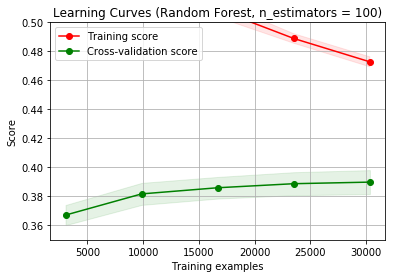

--------------------plot_learning_curve-----------------
debug rfr success! 
 cost time: 271.93209767341614 (s)


In [7]:


start_time = time.time()
cv = 3
debug_1={#'n_estimators':range(70,130,10),
                   'max_depth':range(4,9,1)}
estimator = RandomForestRegressor(n_estimators = 100, criterion='mse',  max_features=0.2, max_depth=8,n_jobs=4)
gsearch1 = model_selection.GridSearchCV(
    estimator,
    param_grid=debug_1,
    #scoring='neg_mean_squared_error',
    n_jobs=1,
    iid=False,
    verbose=1,
    #cv=5
    cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X, y]))
gsearch1.fit(X, y)
preds = gsearch1.predict(offline_test)
print("--------------------DEBUG RESULTS-----------------")
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print("--------------------DEBUG RESULTS-----------------")
print("--------------------VAL SCORE-----------------")
print( gsearch1.score(val_X, val_y))
print ("preds RMSE:",np.sqrt(metrics.mean_squared_error(offline_test_y, preds)))
print("--------------------VAL SCORE-----------------")
print("--------------------plot_learning_curve-----------------")
yy = train.loan_sum
XX = train.drop(['loan_sum'],axis=1)
title = "Learning Curves (Random Forest, n_estimators = 100)"
plot_learning_curve(estimator, title, XX, yy, (0.35, 0.5), cv=cv, n_jobs=1)
plt.show()
print("--------------------plot_learning_curve-----------------")
# print("--------------------test-----------------")
# preds_online = gsearch1.predict(tests)

# online['loan_sum']=preds_online

# online.to_csv("./result_jd_100_rfr_8_new_1.csv",index=None,encoding='utf-8')
# print("--------------------test-----------------")
cost_time = time.time()-start_time
print( "debug rfr success!",'\n',"cost time:",cost_time,"(s)" )

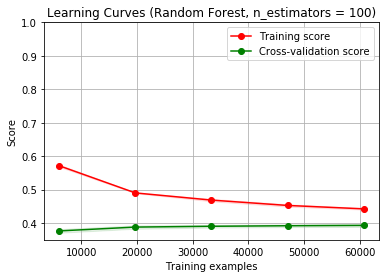

In [9]:

title = "Learning Curves (Random Forest, n_estimators = 100)"
plot_learning_curve(estimator, title, XX, yy, (0.35, 1), cv=cv, n_jobs=1)
plt.show()

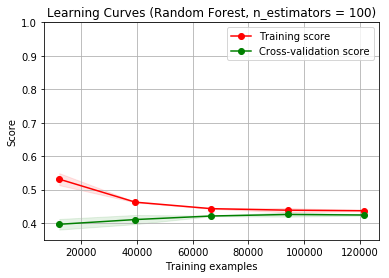

In [3]:
title = "Learning Curves (Random Forest, n_estimators = 100)"
estimator = RandomForestRegressor(n_estimators = 120, criterion='mse',  max_features=0.2, max_depth=8,n_jobs=4)
plot_learning_curve(estimator, title, XX, yy, (0.35, 1), cv=3, n_jobs=1)
plt.show()
